
## Homework 5 - Gender Differences in University Enrollment


* A boxplot of the average number of total enrollment for the states in the U.S. West


* Order the plot based on the number of institutions in the state

* A boxplot of the average number of enrollment per gender category (hue) and state in the U.S.

* Develop the ratio of admissions for women and for men in the Bay Area. Standardize this ratio on the mean.
 Interpret you plots in terms of gender differences.


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [3]:
c = students = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
universities.csv')

In [168]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

In [13]:
filteredDF = students[students['STABBR'].isin(uswest)]

We are now concentrating on the Enrollments in Universities in the US-West region. Hence, the dataframe is filtered based on the list of states which are under the US-West region.


Reference : https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [89]:
westDF = filteredDF.groupby('STABBR')['ENRLT'].agg(['mean','count','min','max']).sort_values(by='count',ascending=False)

The mean of the Enrollment values is calculated and sorted based on the Number of Universities in each state in the US-West region. This gives an overview of the Enrollment numbers based on the states in the US-West region.

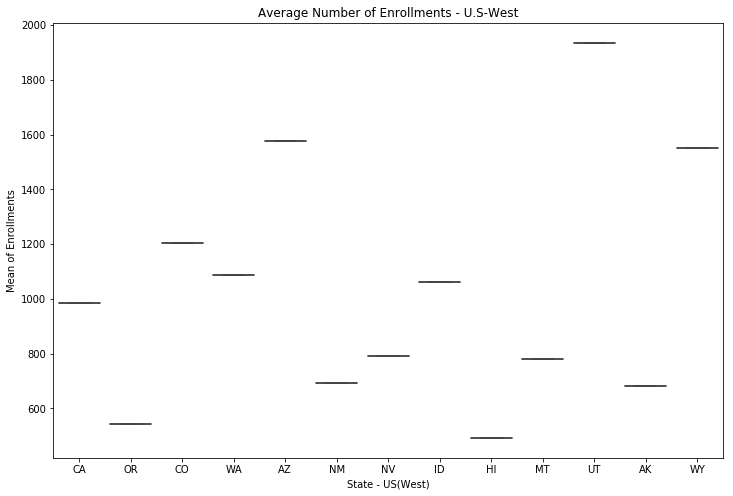

In [204]:
plt.figure(figsize=(12,8))
ax = sn.boxplot(x=westDF.index,y='mean',data=westDF);
ax.set(xlabel='State - US(West)',ylabel='Mean of Enrollments');
ax.set_title("Average Number of Enrollments - U.S-West");

### Average Number of Total Enrollments in U.S-West :
A Boxplot is created based on the mean values. Here, the data used for the Boxplot has only the mean values and is ordered by the Number of Universities. For example, California when compared to Wyoming has lesser number of Average Enrollments but it has more number of Universities and hence it can be assumed that the total number of students in California is higher than the total number of students in Wyoming. Here, the data for California is higher because number of Universities having the data is 144 and Wyoming has data of only 1 University. This can be due to the fact that, California is home to the 'Bay-Area' which is the hub for major tech companies in the U.S.


Reference :

https://seaborn.pydata.org/examples/grouped_boxplot.html

https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger

In [172]:
genderDF = pd.melt(filteredDF,id_vars=['STABBR','INSTNM'],value_vars=['ENRLM','ENRLW'],var_name='ENRL_GENDER',value_name='ENROLLMENT_NO')

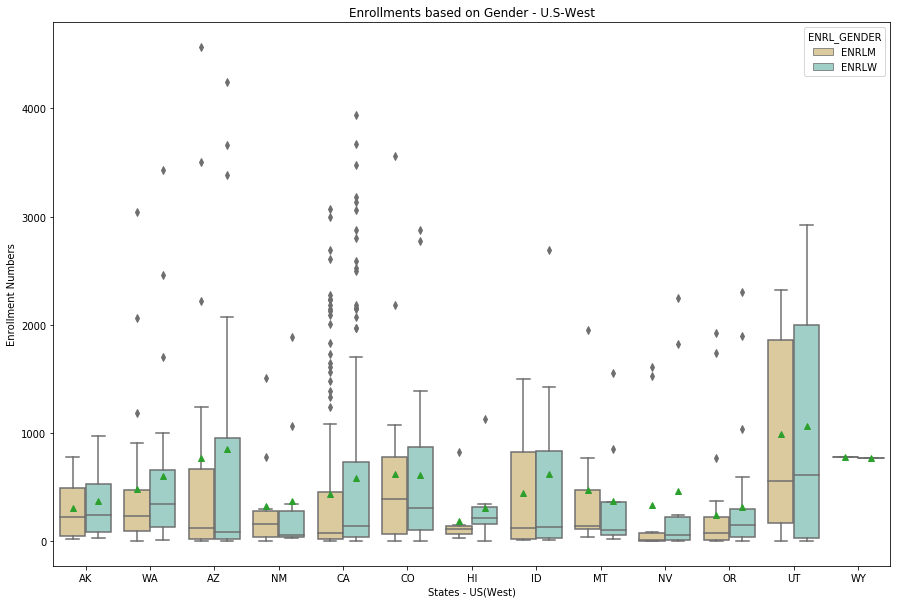

In [206]:
plt.figure(figsize=(15,10))
ax = sn.boxplot(x='STABBR',y='ENROLLMENT_NO',data=genderDF,hue='ENRL_GENDER',palette='BrBG',showmeans = True);
ax.set(xlabel='States - US(West)',ylabel = 'Enrollment Numbers');
ax.set_title("Enrollments based on Gender - U.S-West");

### Enrollments based on Gender - U.S(West)

The melt function has been used to combine the values of Enrollments based on gender,either Men or Women, for each university in the US-West region. The new dataframe melted based on gender is plotted using a Boxplot which shows the min,max,mean,median and Quartile values. The Hue is based on the Gender of the number of people enrolled in Universities in the states of U.S-West region. A legend shows details of the hues.
As it can be seen from the Boxplot, the mean values are affected by the outliers that are present in the Data. Especially for California there are outliers where the Enrollment numbers are very high. Wyoming has data for only 1 University and hence it might not be best represented using a Boxplot.


Reference : 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html





In [66]:
bayDF = students[(students['ZIP'].str.startswith('950') | students['ZIP'].str.startswith('94')) & (students['ENRLT'] > 1000)].copy()

A new Dataframe is created based on filtered values - Universities in the Bay Area

In [97]:
bayDF['Ratio'] = bayDF['ADMSSNM']/bayDF['ADMSSNW']

In [98]:
bayDF = bayDF.sort_values(by='Ratio',ascending=False)

In [99]:
bayDF['Std_Ratio'] = bayDF['Ratio']/bayDF['Ratio'].mean()

In [113]:
bayDF = bayDF.sort_values(by='Std_Ratio',ascending=True)

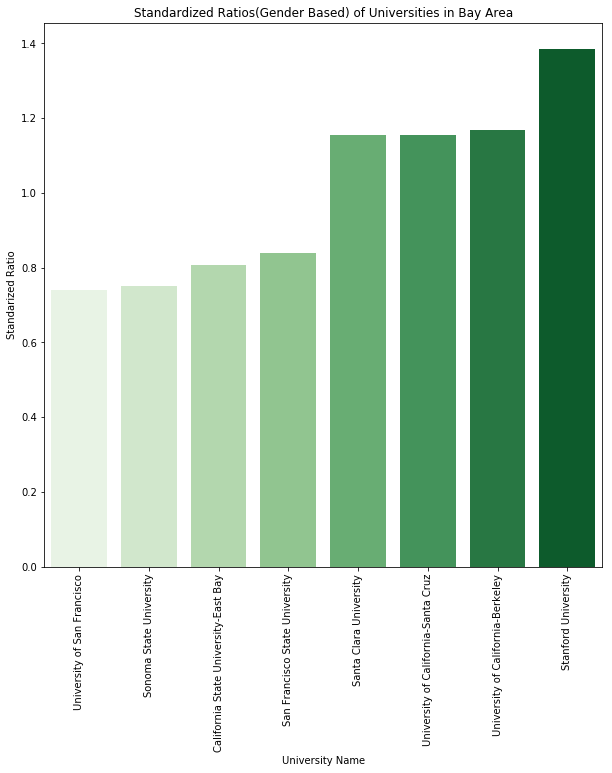

In [211]:
plt.figure(figsize=(10,10))
ax = sn.barplot(x='INSTNM',y='Std_Ratio',data=bayDF,palette="Greens")
ax.set(xlabel='University Name', ylabel='Standarized Ratio')
ax.set_title("Standardized Ratios(Gender Based) of Universities in Bay Area")
ax.set_xticklabels(labels=bayDF['INSTNM'],rotation=90);

### Standardized Ratios of Number of Men and Women - Bay Area :

First, a Ratio is created for each and every University based on the Number of Admissons of Men and Women. This gives an overview of whether admissions for the number of men or number of women are greater. This value is then standarized based on the mean of all ratios across multiple universities in the state. Based on the Ratio values, it can be understood that the number of admission for Men in all the Universities is lower than the number of admissions for Women. In the above Barplot, we can see that the Standardized ratio is lowest in University of San Francisco, when we observe the data closely, the number of Men is very much lower than the Number of Women admissions in the University, so this is the reason for the low Standaradized mean ratio. Whereas at Stanford University, the number of admissions of Men is almost equal to the number of admissions of Women, this has the lowest difference between the number of Admissions for Men and Number of admissions for Women.


### Conclusion

Based on the Analysis above, the conclusions that could be drawn are - 

* California has the highest Enrollment in the U.S-West region and also the highest number of Universities, based on the Data.

* The Enrollments based on Gender in the U.S-West region does not have a balanced feel because many Universities have a higher Women Enrollment and others have almost equal Enrollment.

* In the Bay Area, all the Universities have a higher Female Admissions than the Male Admission numbers. This might have had a effect on the actual number of Enrollments as in California, Enrollment of Men is lower than the Enrollment of Women.

